# LawrenceHuang-L02-Visualization

## Author - Lawrence Huang



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g., small multiples) on both categorical and numeric variables.

In [1]:
# Load necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount = pd.read_csv(filename)
headcount.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


In [3]:
# Examine number of variable values
headcount.nunique()

GameCode         22
DateFormat      366
Hour             24
TablesOcc        25
TablesOpen       25
TablesClosed     24
HeadCount       110
DayOfWeek         7
DayNumber       366
dtype: int64

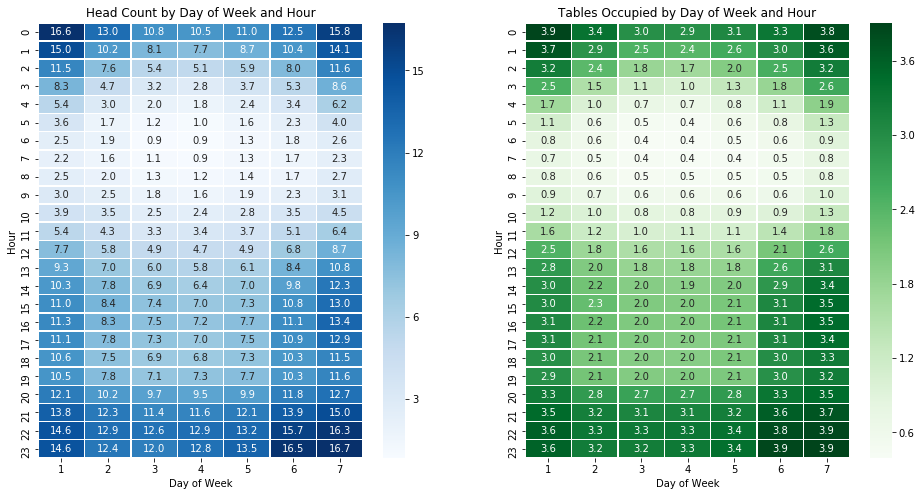

In [4]:
# Data view: Head Count and Tables Occupied by Day of Week and Hour

# Create pivot tables for plotting
HeadCount_pivot = headcount.pivot_table(index='Hour', columns='DayOfWeek', values='HeadCount')
TablesOcc_pivot = headcount.pivot_table(index='Hour', columns='DayOfWeek', values='TablesOcc')

fig, axs = plt.subplots(1,2, figsize=(16,8))
sns.heatmap(HeadCount_pivot, annot=True, fmt='.1f', linewidth=0.5, cmap='Blues', ax=axs[0])
sns.heatmap(TablesOcc_pivot, annot=True, fmt='.1f', linewidth=0.5, cmap='Greens', ax=axs[1])
axs[0].set_xlabel('Day of Week')
axs[0].set_ylabel('Hour')
axs[0].set_title('Head Count by Day of Week and Hour')
axs[1].set_xlabel('Day of Week')
axs[1].set_ylabel('Hour')
axs[1].set_title('Tables Occupied by Day of Week and Hour')
plt.show()

<b>Observations</b>:
<br> Head Count and Tables Occupied are:
        <li>Highest on Day 1 (Sunday), 6 (Friday), 7 (Saturday) at Hour 21-1</li>
        <li>Lowest during mornings (Hour 4-11) and especially during the weekday (Day 2, 3, 4, 5)</li>
<br><b>Chart type/aesthetics used</b>: Heatmap

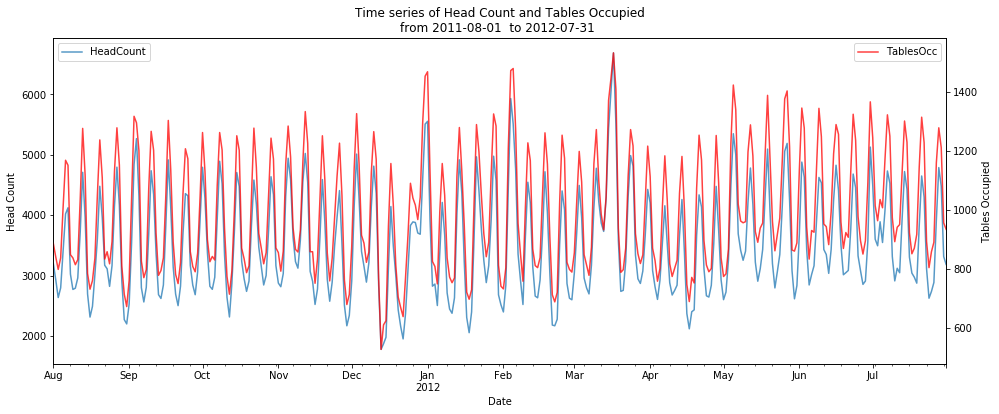

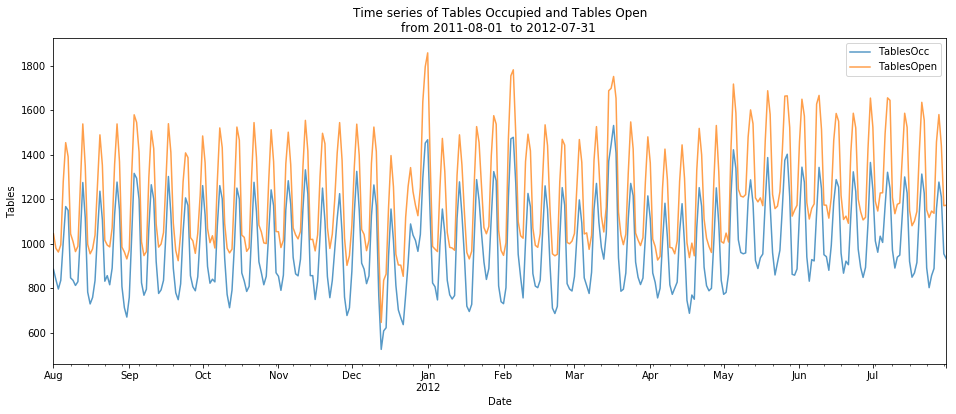

In [5]:
# Data view: Time series of Head Count, Tables Occupied, and Tables Open
# Convert Date to datetime
headcount.loc[:, 'DateFormat'] = pd.to_datetime(headcount.loc[:, 'DateFormat']) 

# Overlay HeadCount (left y-axis) and TablesOcc (right y-axis)
fig = plt.figure(figsize=(16,6))
ax = fig.gca()
ax1 = headcount.groupby('DateFormat')['HeadCount'].sum().plot(ax=ax, alpha=0.75, lw=1.5)
ax2 = headcount.groupby('DateFormat')['TablesOcc'].sum().plot(ax=ax, alpha=0.75, lw=1.5, secondary_y=True, color='r')
ax.set_xlabel('Date')
ax1.set_ylabel('Head Count')
ax2.set_ylabel('Tables Occupied')
ax.set_title('Time series of Head Count and Tables Occupied\nfrom '+str(np.min(headcount['DateFormat']))[:11]+' to '+str(np.max(headcount['DateFormat']))[:11])
ax1.legend(loc=2)
ax2.legend(loc=0)
plt.show()

# Overlay TablesOcc and TablesOpen
fig = plt.figure(figsize=(16,6))
ax = fig.gca()
headcount.groupby('DateFormat')[['TablesOcc', 'TablesOpen']].sum().plot(ax=ax, alpha=0.75, lw=1.5)
ax.set_xlabel('Date')
ax.set_ylabel('Tables')
ax.set_title('Time series of Tables Occupied and Tables Open\nfrom '+str(np.min(headcount['DateFormat']))[:11]+' to '+str(np.max(headcount['DateFormat']))[:11])
ax.legend(loc=0)
plt.show()

<b>Observations</b>:
        <li>Head Count, Tables Occupied, and Tables Open are cyclic within a month (presumbaly dependent on DayOfWeek as shown above in the Heatmap)</li>
        <li>Generally, there are free tables at any given time (more Tables Open than Tables Occupied)</li>
<br><b>Chart type/aesthetics used</b>: Line plot

In [6]:
# Compute Head Count per Occupied Table
headcount['HeadPerTable'] = headcount['HeadCount']/headcount['TablesOcc']

# Bin Hours to keep the plots reasonable (limit the number of levels from 24 to 4)
# Bins: 12-5am, 6-11am, 12-5pm, 6-11pm
headcount.loc[:, 'HourBin'] = pd.cut(headcount.loc[:, 'Hour'], bins = 4, labels = ['12-5am','6-11am','12-5pm','6-11pm'])

# Bin DayOfWeek to keep the plots reasonable (limit the number of levels from 7 to 2)
# Sunday, Friday, Saturday set as 1, Monday-Thursday as 0
headcount['Weekend'] = headcount['DayOfWeek'].map({1:1, 2:0, 3:0, 4:0, 5:0, 6:1, 7:1})

In [7]:
# There are 22 games. To keep the plots reasonable, find the 5 most popular games with the largest mean head count.

# Optional plot of mean Head Count
# headcount.groupby('GameCode')['HeadCount'].mean().sort_values(ascending=False).plot.bar()
# plt.title('Mean HeadCount by GameCode')
# plt.ylabel('Mean HeadCount')
# plt.show()

# Examine the 5 most popular games
popular_games_list = headcount.groupby('GameCode')['HeadCount'].mean().sort_values(ascending=False).index[:5].to_list()
print('Top 5 games by mean head count:\n', popular_games_list)
popular_games = headcount[headcount['GameCode'].isin(popular_games_list)]

Top 5 games by mean head count:
 ['S6', 'CR', 'TP', 'FP', 'RO']


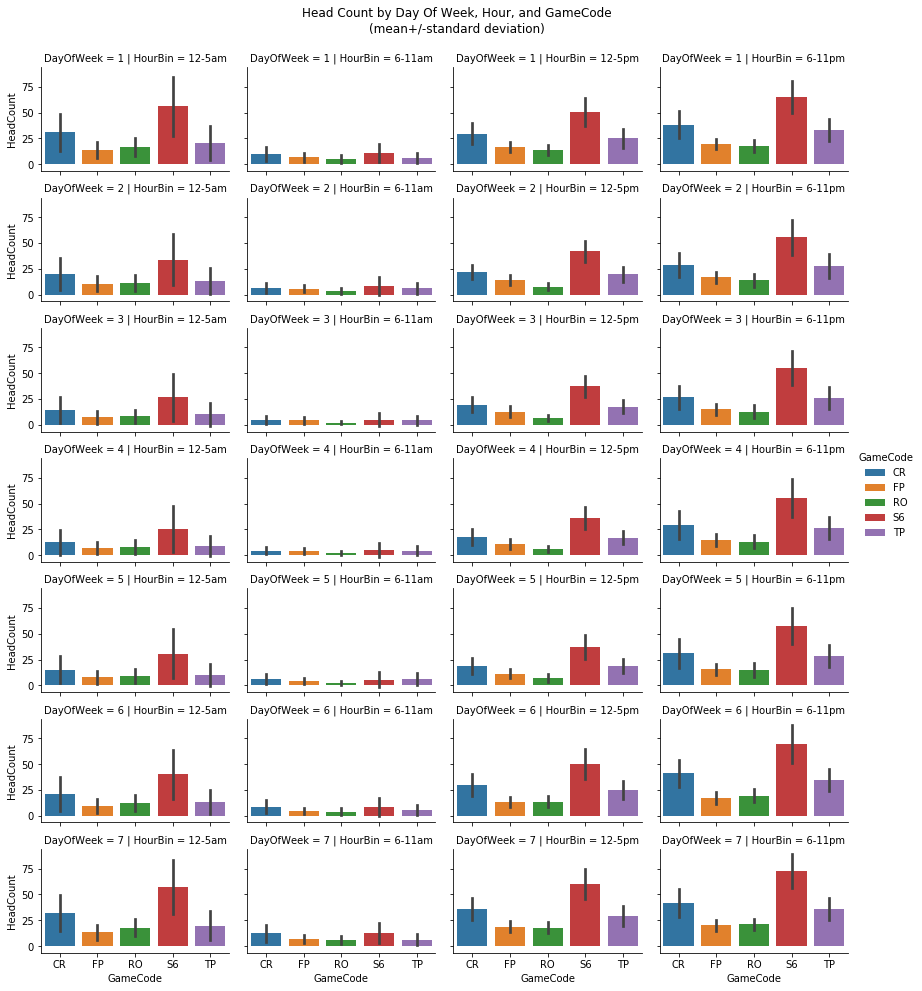

In [8]:
# Data view: Head Count by Day Of Week, Hour (binned), and GameCode
oo = popular_games['GameCode'].unique() # specify possible levels
g = sns.FacetGrid(popular_games, height=2, aspect=1.5, 
                  row='DayOfWeek',
                  col='HourBin',
                  hue='GameCode')

g = g.map(sns.barplot, 'GameCode', 'HeadCount', order=oo, ci='sd').add_legend()
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Head Count by Day Of Week, Hour, and GameCode\n(mean+/-standard deviation)') 
plt.show()

<b>Observations</b>:
        <li>For the GameCodes examined, mean HeadCount is highest for S6 for all DaysOfWeek and HourBin.</li>
        <li>For all games, mean HeadCount is lowest between 6am to 11am.</li>
        <li>Generally, the mean HeadCount order (S6>CR>TP, etc) remains the same across DaysOfWeek.</li>
<br><b>Chart type/aesthetics used</b>: FacetGrid with bar plots

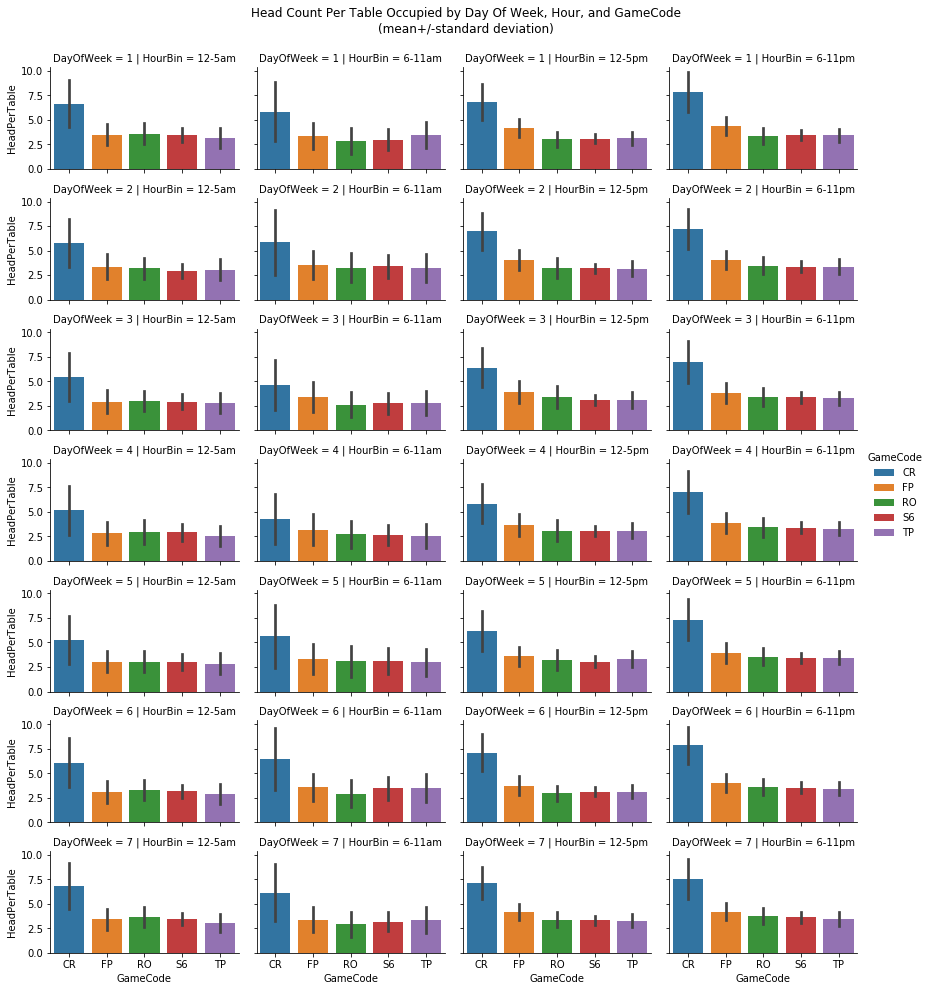

In [9]:
# Data view: Head Count Per Table Occupied by Day Of Week, Hour (binned), and GameCode
oo = popular_games['GameCode'].unique() # specify possible levels
g = sns.FacetGrid(popular_games, height=2, aspect=1.5, 
                  row='DayOfWeek',
                  col='HourBin',
                  hue='GameCode')

g = g.map(sns.barplot, 'GameCode', 'HeadPerTable', order=oo, ci='sd').add_legend()
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Head Count Per Table Occupied by Day Of Week, Hour, and GameCode\n(mean+/-standard deviation)') 
plt.show()

<b>Observations</b>:
        <li>For the GameCodes examined, mean HeadCount per TablesOcc is highest for CR for all DaysOfWeek and HourBin (suggesting that higher mean HeadCount for S6 was accompanied by higher TablesOcc.)</li>
        <li>For all games, mean HeadCount per TablesOcc remains relatively constant across DayOfWeek and HourBin (consistent with the positive correlation between HeadCount and TablesOcc as shown in the line plot above).</li>    
<b>Chart type/aesthetics used</b>: FacetGrid with bar plots

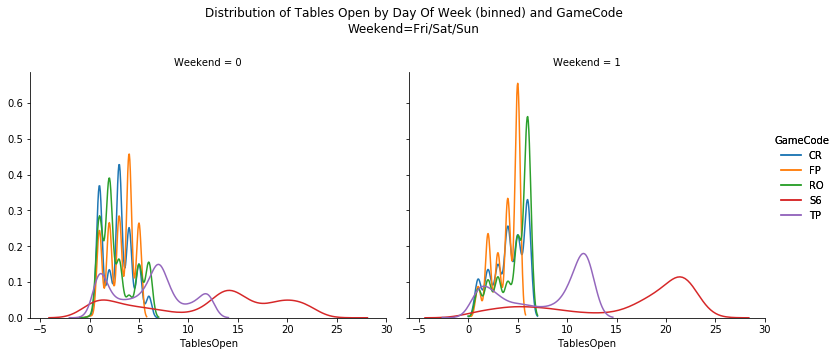

In [10]:
# Data view: Distribution of Tables Open by Day Of Week (binned) and GameCode
g = sns.FacetGrid(popular_games, height=5, aspect=1, 
                  col='Weekend',
                  hue='GameCode')
g = g.map(sns.distplot, 'TablesOpen', hist=False).add_legend().add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Tables Open by Day Of Week (binned) and GameCode\nWeekend=Fri/Sat/Sun') 
plt.show()

<b>Observations</b>:
        <li>For CR, FP, RO games, there were generally between 0 and 10 Tables Open. For S6, TP games, the range of Tables Open was larger.</li>
        <li> On Fri/Sat/Sun, there was a distribution peak around 22 Tables Open for S6 and around 12 Tables Open for TP.</li>
      <br><b>Chart type/aesthetics used</b>: FacetGrid with histograms

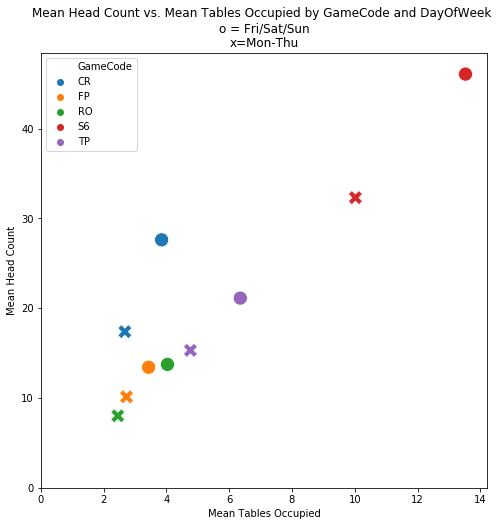

In [11]:
# Data view: Mean Head Count and Mean Tables Occupied by GameCode and Day Of Week (binned)
headcount_m = popular_games.groupby(['Weekend', 'GameCode'])[['TablesOcc', 'HeadCount']].mean().reset_index()

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
sns.scatterplot(x='TablesOcc', y='HeadCount', data=headcount_m.groupby('Weekend').get_group(0), hue='GameCode', s=200, marker='X', ax=ax)
sns.scatterplot(x='TablesOcc', y='HeadCount', data=headcount_m.groupby('Weekend').get_group(1), hue='GameCode', s=200, marker='o', ax=ax)

# Draw only one set of legends
handles, labels = ax.get_legend_handles_labels()
handles = handles[:6]
labels = labels[:6]
ax.legend(handles, labels)

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel('Mean Tables Occupied')
ax.set_ylabel('Mean Head Count')
ax.set_title('Mean Head Count vs. Mean Tables Occupied by GameCode and DayOfWeek \no = Fri/Sat/Sun\nx=Mon-Thu')
plt.show()

<b>Observations</b>:
        <li>Overall, mean Head Count was positively correlated with mean Tables Occupied.</li>
        <li>Overall, for a given GameCode, mean Head Count and mean Tables Occupied were larger on Friday/Saturday/Sunday compared to Monday-Thursday.</li>
        <li>S6 game had the largest mean Head Count and mean Tables Occupied.</li>
<br><b>Chart type/aesthetics used</b>: Scatterplot with additional dimensions provided by marker color (GameCode) and marker shape (DayOfWeek binned)